# Exploratory Data Analysis

In [45]:
# !pip install geopandas

     |████████████████████████████████| 962 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 13.0 MB 14.4 MB/s eta 0:00:01
     |████████████████████████████████| 14.0 MB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 16.4 MB/s eta 0:00:01


In [46]:
# Libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import geopandas
from datetime import datetime
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('./Data/data_cleaned_df.csv')

In [3]:
df.head()

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,True,GeoData Consultants Ltd,Other,Missing,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,Missing,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,None,Missing,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [5]:
df.shape

(59400, 40)

## Heatmap for correlation

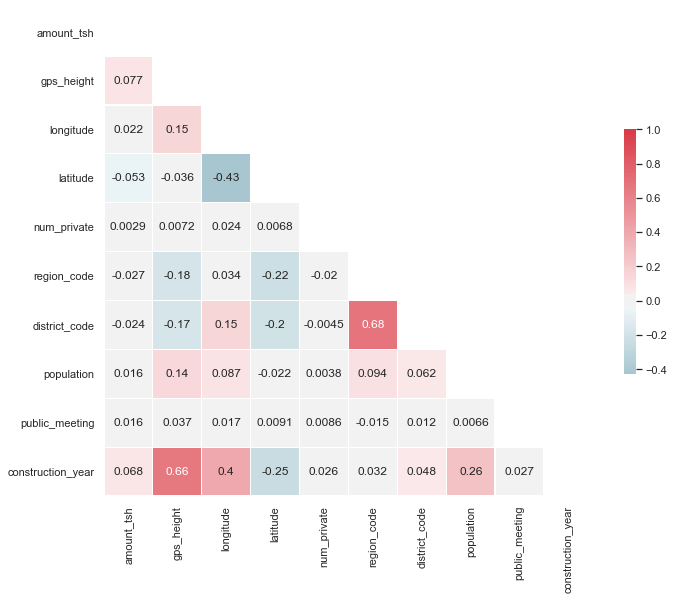

In [6]:
sns.set(style="white")
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

## status_group: target variable

First, I want to see status_group distribution which is our target variable.

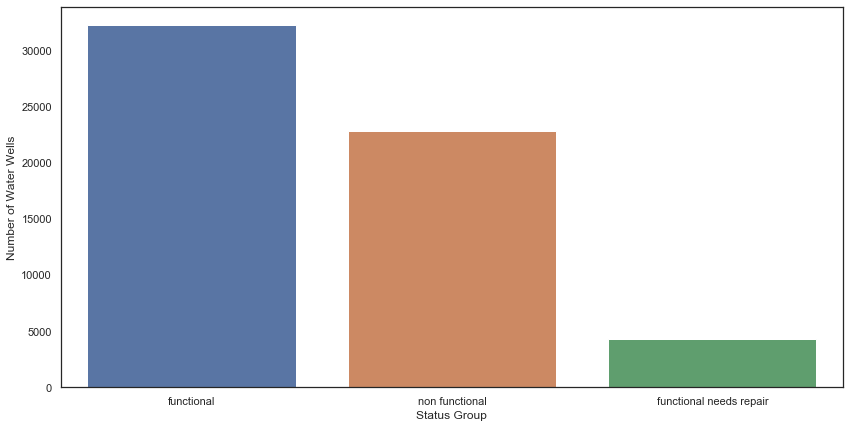

In [7]:
fig, ax = plt.subplots(figsize = (14,7))
sns.countplot(df['status_group']);
ax.set_xlabel('Status Group');
ax.set_ylabel('Number of Water Wells');
plt.show()

In [8]:
df.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

Now using pie chart to get a sense of percentages of these status groups.

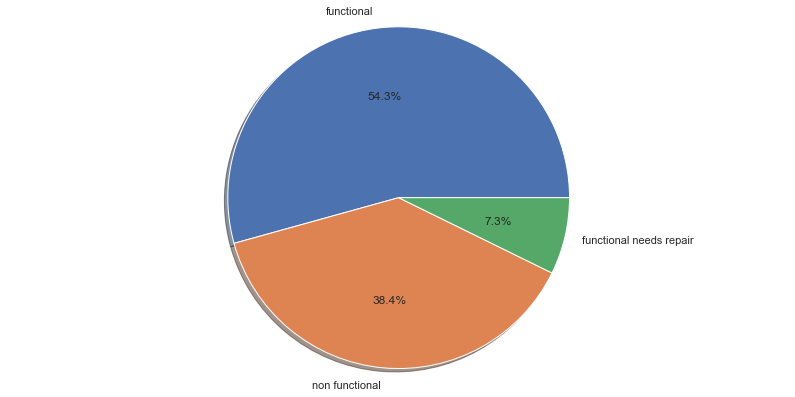

In [9]:
fig, ax = plt.subplots(figsize = (14,7))
sizes = [df['status_group'].value_counts()[0],
         df['status_group'].value_counts()[1],
         df['status_group'].value_counts()[2],
        ]
# print(sizes) # adds up to 1433, which is the total number of participants
ax.pie(sizes, labels=df['status_group'].unique(), autopct='%1.1f%%', shadow=True)
ax.axis('equal')
plt.show()

## status_group vs amount_tsh: 
Total static head (amount water available to waterpoint)

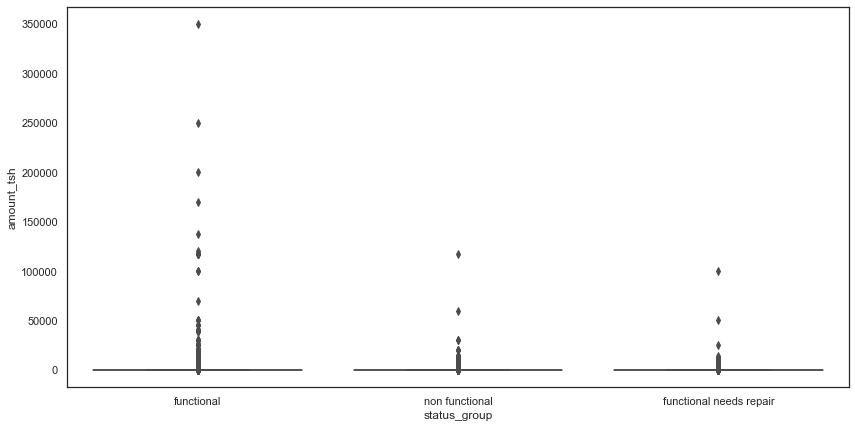

In [10]:
fig, ax = plt.subplots(figsize = (14,7))
sns.boxplot(x='status_group', y='amount_tsh', data=df);

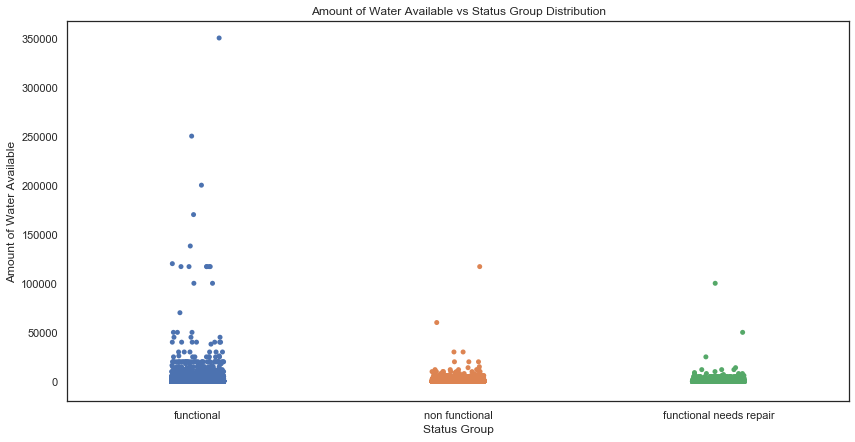

In [11]:
fig, ax = plt.subplots(figsize = (14,7))
sns.stripplot(x='status_group', y='amount_tsh', data=df);
ax.set_ylabel('Amount of Water Available');
ax.set_xlabel('Status Group');
ax.set_title('Amount of Water Available vs Status Group Distribution');

From our boxplot and stripplot, we can see the distribution of status groups and amount of water available to waterpoint. We can also notice that there is one large outlier with roughly around 350000 amount of water. And we can see that functional wells tend to have higher amount_tsh in comparison to non functional and need repair wells.

## status_group vs gps_height:

gps_height refers to the altitude of the well. We will see if we can see any relationship between the two.

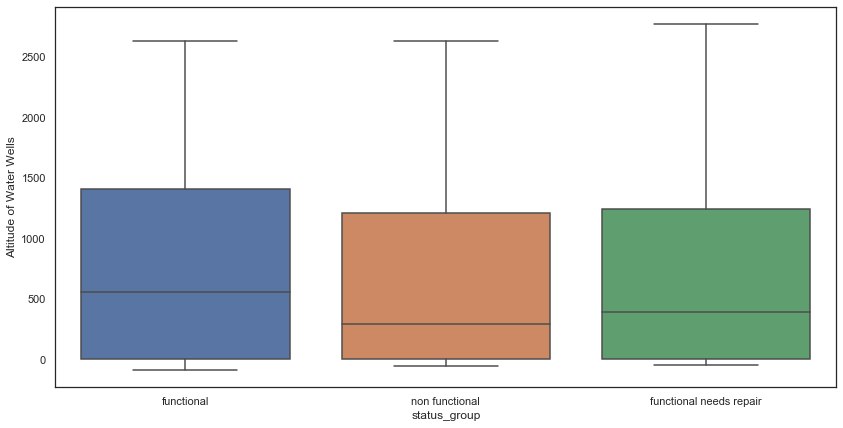

In [12]:
fig, ax = plt.subplots(figsize = (14,7))
sns.boxplot(df['status_group'], df['gps_height']);
ax.set_ylabel('Altitude of Water Wells');

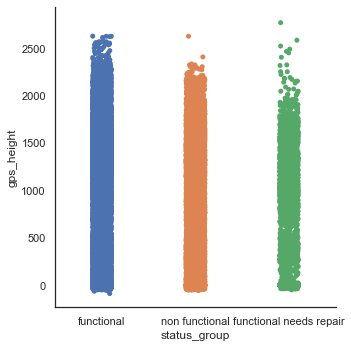

In [13]:
sns.catplot(x = 'status_group', y= 'gps_height', data=df, kind='strip');


From our box plot, we can see the where most of our data lies which is between 0 to 131. However, we can note that the gps height can go below 0. Unfortunately, from this graph, we cannot note on height to determine the relationships of status groups and altitude of water wells.

## status_group vs population:

In [14]:
df['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

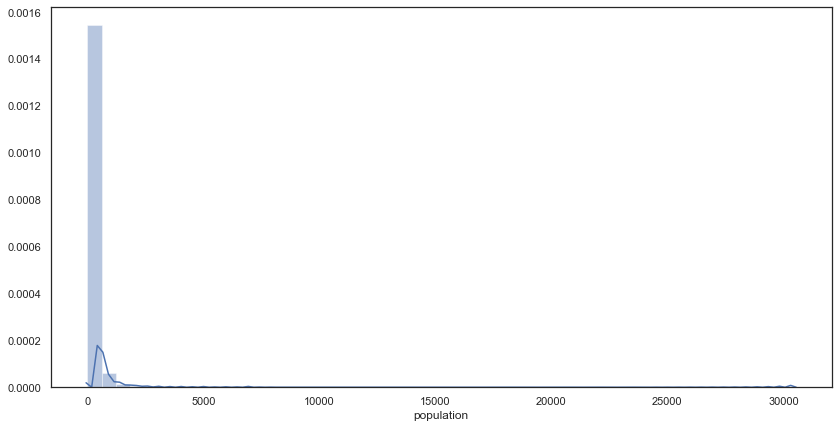

In [15]:
fig, ax = plt.subplots(figsize = (14,7))
sns.distplot(df['population']);

## quality_group by different status groups

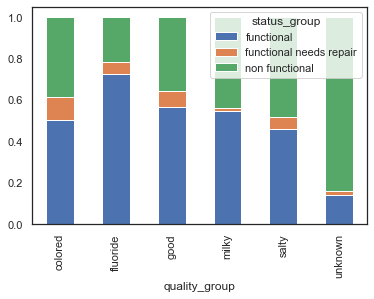

In [56]:
pd.crosstab(df['quality_group'], df['status_group'], normalize='index').plot.bar(stacked=True);

# plt.tight_layout();

Here we can see that if water wells water quality is unknown it is going to be non functional most of the times. 

## water_quality by different status groups 

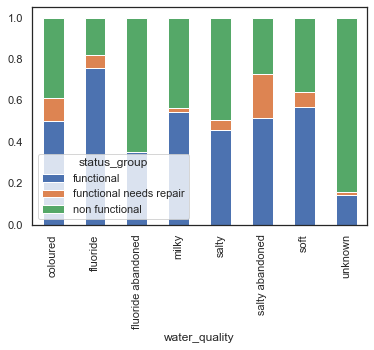

In [55]:
pd.crosstab(df['water_quality'], df['status_group'], normalize='index').plot.bar(stacked=True);
# plt.tight_layout()

## waterpoint_type by different status groups

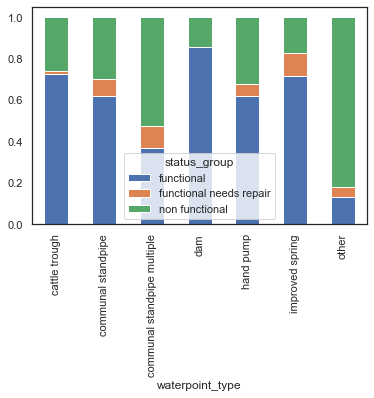

In [54]:
pd.crosstab(df['waterpoint_type'], df['status_group'], normalize='index').plot.bar(stacked=True);
# plt.tight_layout()

## source_class by different status groups

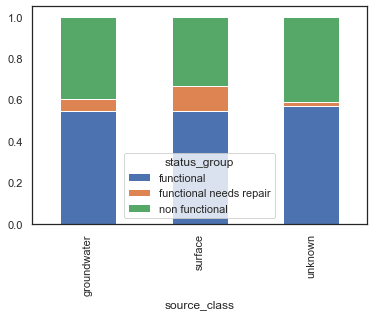

In [57]:
pd.crosstab(df['source_class'], df['status_group'], normalize='index').plot.bar(stacked=True);


## Geopandas

In [47]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))

In [48]:
gdf

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,geometry
0,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,POINT (34.93809 -9.85632)
1,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,True,GeoData Consultants Ltd,Other,Missing,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,POINT (34.69877 -2.14747)
2,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,POINT (37.46066 -3.82133)
3,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,Missing,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,POINT (38.48616 -11.15530)
4,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,None,Missing,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,POINT (31.13085 -1.82536)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,POINT (37.16981 -3.25385)
59396,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,POINT (35.24999 -9.07063)
59397,functional,0.0,2011-04-11,Missing,0,Missing,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,Missing,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,POINT (34.01709 -8.75043)
59398,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,Missing,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,

In [ ]:
# need to find shape file for gdf

In [51]:
df.source_class.value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64